# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import plot_confusion_matrix
from wordcloud import WordCloud 

In [2]:
dataFrame = pd.read_csv('complaints_processed.csv')

In [3]:
dataFrame.head(10)

Unnamed: 0           product  \
0           0       credit_card   
1           1       credit_card   
2           2    retail_banking   
3           3  credit_reporting   
4           4  credit_reporting   
5           5  credit_reporting   
6           6  credit_reporting   
7           7  credit_reporting   
8           8  credit_reporting   
9           9  credit_reporting   

                                           narrative  
0  purchase order day shipping amount receive pro...  
1  forwarded message date tue subject please inve...  
2  forwarded message cc sent friday pdt subject f...  
3  payment history missing credit report speciali...  
4  payment history missing credit report made mis...  
5  payment history missing credit report made mis...  
6  va date complaint experian credit bureau invol...  
7  account reported abbreviated name full name se...  
8  account reported abbreviated name full name se...  
9  usdoexxxx account reported abbreviated name fu...

In [4]:
#Checking the shape of the dataset
print('There are',dataFrame.shape[0],'rows and',dataFrame.shape[1],'columns')

There are 162421 rows and 3 columns


In [5]:
#Checking NAN values
print('Missing Values:',dataFrame.isna().sum())

Missing Values: Unnamed: 0     0
product        0
narrative     10
dtype: int64


In [6]:
#There are four classes 
print('Product Counts:\n',dataFrame['product'].value_counts())

Product Counts:
 credit_reporting       91179
debt_collection        23150
mortgages_and_loans    18990
credit_card            15566
retail_banking         13536
Name: product, dtype: int64


In [7]:
# Analysing dataframe attributes 
print('* Datatype of columns are:\n {}\n'.format(dataFrame.dtypes))

* Datatype of columns are:
 Unnamed: 0     int64
product       object
narrative     object
dtype: object



In [8]:
#Since there are very few missing values, we can drop them
dataFrame.dropna(axis=0,inplace=True)

In [9]:
dataFrame.isna().sum()

Unnamed: 0    0
product       0
narrative     0
dtype: int64

In [10]:
# Removing SNo column
dataFrame.drop(['Unnamed: 0'], axis=1, inplace=True)
dataFrame.head()

product                                          narrative
0       credit_card  purchase order day shipping amount receive pro...
1       credit_card  forwarded message date tue subject please inve...
2    retail_banking  forwarded message cc sent friday pdt subject f...
3  credit_reporting  payment history missing credit report speciali...
4  credit_reporting  payment history missing credit report made mis...

# Exploratory Data Analysis

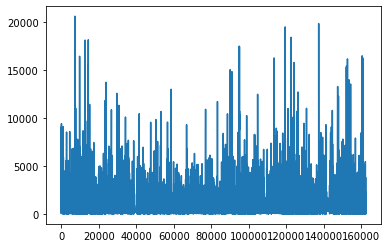

In [11]:
# Plotting word lenghts of narrative
word_length = [len(x) for x in dataFrame['narrative']]
plt.plot(word_length)

In [12]:
# Converting sentences to string
dataFrame['narrative'] = dataFrame['narrative'].astype(str)

In [13]:
dataFrame.head()

product                                          narrative
0       credit_card  purchase order day shipping amount receive pro...
1       credit_card  forwarded message date tue subject please inve...
2    retail_banking  forwarded message cc sent friday pdt subject f...
3  credit_reporting  payment history missing credit report speciali...
4  credit_reporting  payment history missing credit report made mis...

In [14]:
# Types of products
dataFrame['product'].value_counts()

credit_reporting       91172
debt_collection        23148
mortgages_and_loans    18990
credit_card            15566
retail_banking         13535
Name: product, dtype: int64

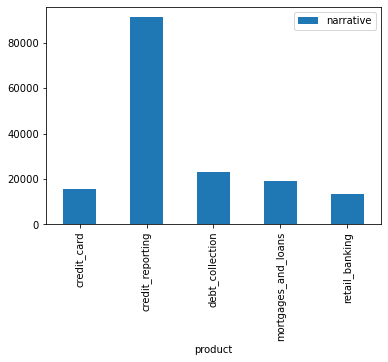

In [15]:
# Plotting product value counts
dataFrame.groupby('product').count().plot(kind='bar')
plt.show()

Dataframe is <b>imbalanced</b>. Improving the balance of the dataframe can improve <b>accuracy</b>.

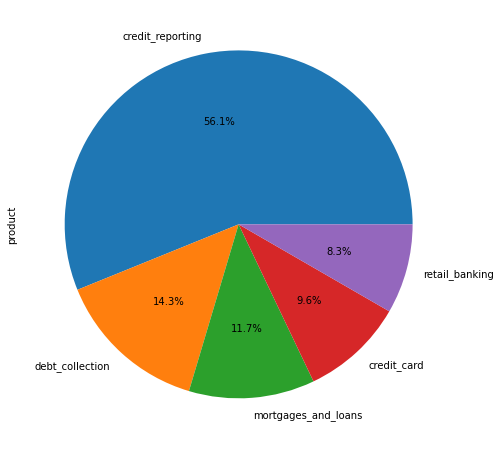

In [16]:
plt.figure(figsize=(10,8))
dataFrame['product'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

/Users/ashish/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


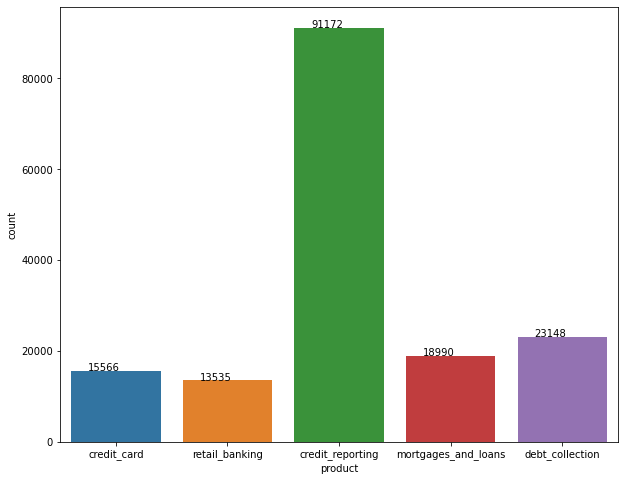

In [17]:
dataFrame['product'].nunique()
fig=plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
s=sns.countplot('product', data = dataFrame)
for s in ax.patches:
    ax.annotate('{:.0f}'.format(s.get_height()), (s.get_x()+0.15, s.get_height()+1))
plt.show()

# Text Cleaning

## Removal of stop words

In [18]:
import nltk
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [19]:
dataFrame['narrative']=dataFrame['narrative'].apply(str)
word_list = list(dataFrame['narrative'])
filtered_words = [word for word in word_list if word not in stopwords.words('english')]

In [20]:
filtered_words

['purchase order day shipping amount receive product week sent followup email exact verbiage paid two day shipping received order company responded im sorry inform due unusually high order volume order shipped several week stock since early due high demand although continuing take order guaranteeing receive order place due time mask order exact shipping date right however guarantee ship soon soon delivers product u getting small shipment shipping first come first served basis appreciate patience fulfill order quickly recommend keeping order lose place line cancel distributor stock moment prefer cancel please note ask via email cancel accordance cancellation policy agreed checkout electronic inventory online requested order canceled refund issued canceled order sent verification order canceled refunded item particulate respirator refunded subtotal shipping tax total usd visa ending refund called disputed amount stated nothing needed submitted address issue recharged item removing called

## Stemming 

In [21]:
import nltk
STOP_WORDS = nltk.corpus.stopwords.words('english')

newStopWords = dataFrame['narrative']

OldStopWords = [OldStopWords for OldStopWords in STOP_WORDS if OldStopWords not in newStopWords]

print(len(STOP_WORDS))
print(STOP_WORDS)


179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than

In [22]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', dataFrame['narrative'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ashish/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
corpus

['purchas order day ship amount receiv product week sent followup email exact verbiag paid two day ship receiv order compani respond im sorri inform due unusu high order volum order ship sever week stock sinc earli due high demand although continu take order guarante receiv order place due time mask order exact ship date right howev guarante ship soon soon deliv product u get small shipment ship first come first serv basi appreci patienc fulfil order quickli recommend keep order lose place line cancel distributor stock moment prefer cancel pleas note ask via email cancel accord cancel polici agre checkout electron inventori onlin request order cancel refund issu cancel order sent verif order cancel refund item particul respir refund subtot ship tax total usd visa end refund call disput amount state noth need submit address issu recharg item remov call back disput amount transact rebillmerchandiserobert ca purchas thu post wed purchas appear statement transact rebil ca u follow see stat

# Lemmatization

In [24]:
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
#lem.lemmatize(word)

In [25]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
corpus = []
for i in range(0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', dataFrame['narrative'][i])
    review = review.lower()
    review = review.split()
    lem = WordNetLemmatizer()
    review = [lem.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ashish/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
corpus

['purchase order day shipping amount receive product week sent followup email exact verbiage paid two day shipping received order company responded im sorry inform due unusually high order volume order shipped several week stock since early due high demand although continuing take order guaranteeing receive order place due time mask order exact shipping date right however guarantee ship soon soon delivers product u getting small shipment shipping first come first served basis appreciate patience fulfill order quickly recommend keeping order lose place line cancel distributor stock moment prefer cancel please note ask via email cancel accordance cancellation policy agreed checkout electronic inventory online requested order canceled refund issued canceled order sent verification order canceled refunded item particulate respirator refunded subtotal shipping tax total usd visa ending refund called disputed amount stated nothing needed submitted address issue recharged item removing called

# WorldCloud

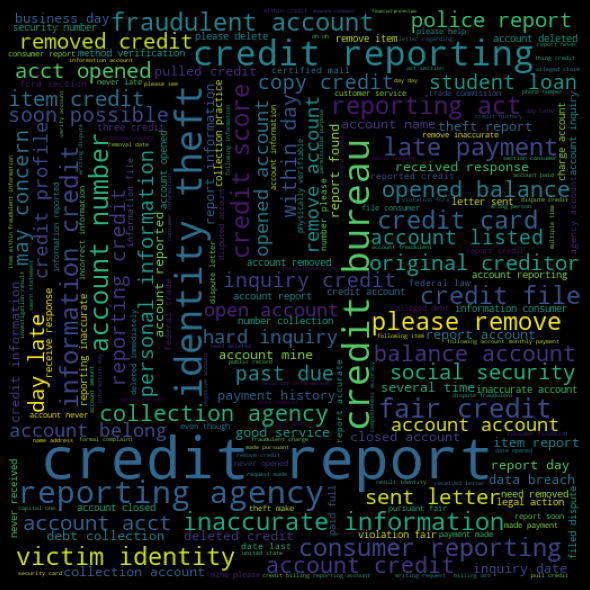

In [27]:
spam_words = ' '.join(list(dataFrame[dataFrame['product'] == 'credit_reporting']['narrative']))
spam_wc = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

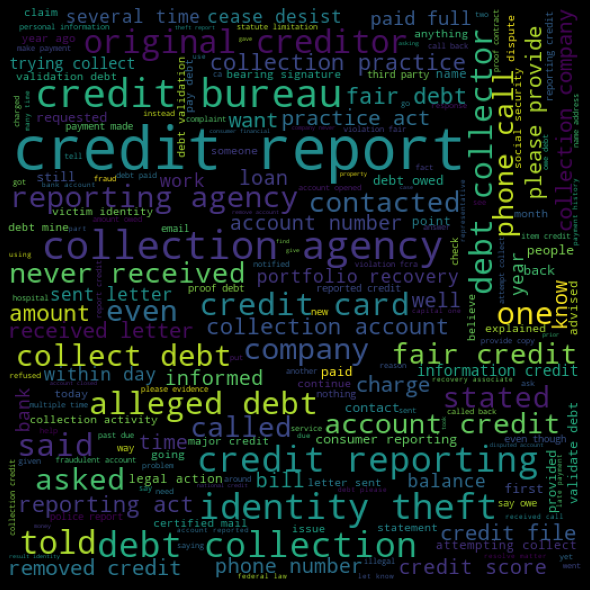

In [28]:
spam_words = ' '.join(list(dataFrame[dataFrame['product'] == 'debt_collection']['narrative']))
spam_wc = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

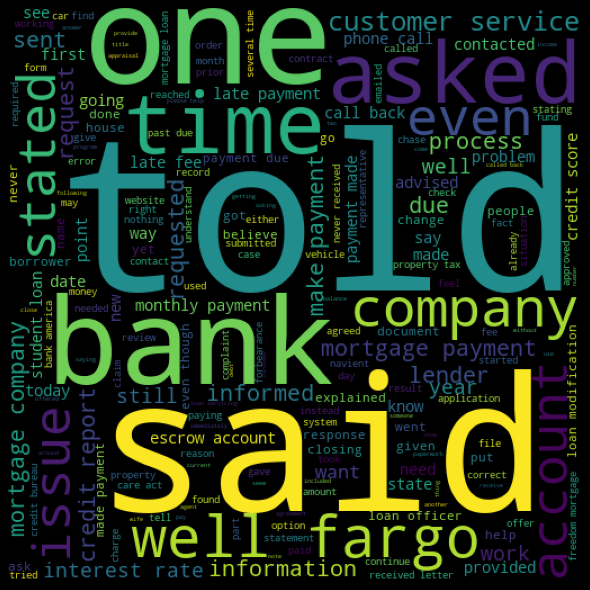

In [29]:
spam_words = ' '.join(list(dataFrame[dataFrame['product'] == 'mortgages_and_loans']['narrative']))
spam_wc = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

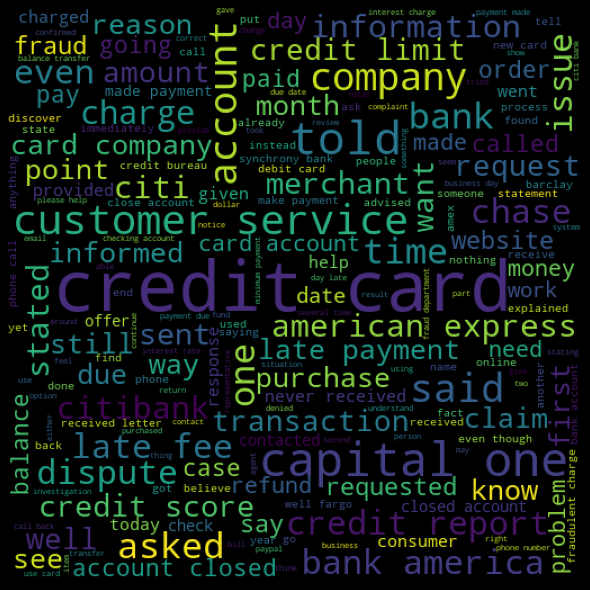

In [30]:
spam_words = ' '.join(list(dataFrame[dataFrame['product'] == 'credit_card']['narrative']))
spam_wc = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

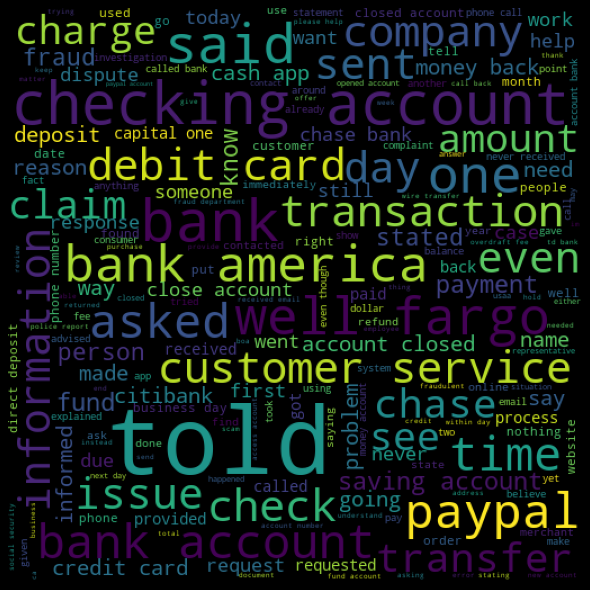

In [31]:
spam_words = ' '.join(list(dataFrame[dataFrame['product'] == 'retail_banking']['narrative']))
spam_wc = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [32]:
#Define function to process our text

stopwords = nltk.corpus.stopwords.words('english')

def text_clean(text):
    """
    The function performs following tasks:
    1. Lower text
    2. Remove digits
    3. Dropping words with less than 3 character
    4. Remove white space
    5. Remove Stopwords
    """
    clean_words = []
    
    word_list = text.split() #Convert to list
    for word in word_list:
        word_l = word.lower().strip()
        if word_l.isalpha():
            if len(word_l) > 3:
                if word_l not in stopwords :
                    clean_words.append(word_l)
                else:
                    continue
    return clean_words       

## TF_IDF

In [33]:
#Creating term document Matrix

tfidf = TfidfVectorizer(analyzer=text_clean)
x_tfidf = tfidf.fit_transform(dataFrame['narrative'])

In [34]:
#View shape of Matrix
x_tfidf.shape

(162411, 43275)

## Train test split 

In [35]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(x_tfidf, dataFrame['product'], test_size=0.2, random_state=42)

In [36]:
#Using RandomForest Classifier

rfc = RandomForestClassifier(n_jobs=-1)
rfc_model = rfc.fit(X_train,y_train)

In [37]:
#Create Pridiction
prediction = rfc_model.predict(X_test)

In [38]:
print("Confusion Matrix:\n\n",confusion_matrix(y_test,prediction))
print("\n")
print("Classification Report:\n\n",classification_report(y_test,prediction))

Confusion Matrix:

 [[ 2137   565    45   102   283]
 [  101 17857   176   128    21]
 [   93  1222  3105   158    37]
 [   67   535   107  2989    72]
 [  207   140    18    55  2263]]


Classification Report:

                      precision    recall  f1-score   support

        credit_card       0.82      0.68      0.74      3132
   credit_reporting       0.88      0.98      0.93     18283
    debt_collection       0.90      0.67      0.77      4615
mortgages_and_loans       0.87      0.79      0.83      3770
     retail_banking       0.85      0.84      0.84      2683

           accuracy                           0.87     32483
          macro avg       0.86      0.79      0.82     32483
       weighted avg       0.87      0.87      0.87     32483



Text(0.5, 1.0, 'Confusion Matrix')

<Figure size 720x720 with 0 Axes>

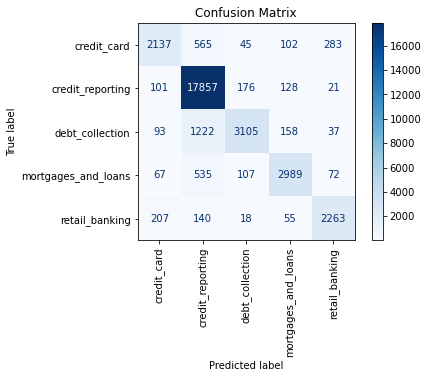

In [39]:
#Plotting normalized confusion matrix
class_names = ['credit_card','credit_reporting','debt_collection','mortgages_and_loans','retail_banking']
plt.figure(figsize=(10,10))
plot_confusion_matrix(rfc,X_test,y_test,cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.title("Confusion Matrix")

## Logistic regression

In [40]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

/Users/ashish/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [41]:
y_pred = classifier.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 2413   373    76    44   226]
 [  270 17107   556   306    44]
 [  115   983  3315   166    36]
 [   74   433   112  3084    67]
 [  189    75    20    44  2355]]


In [43]:
print("Confusion Matrix:\n\n",confusion_matrix(y_test,y_pred))
print("\n")
print("Classification Report:\n\n",classification_report(y_test,y_pred))

Confusion Matrix:

 [[ 2413   373    76    44   226]
 [  270 17107   556   306    44]
 [  115   983  3315   166    36]
 [   74   433   112  3084    67]
 [  189    75    20    44  2355]]


Classification Report:

                      precision    recall  f1-score   support

        credit_card       0.79      0.77      0.78      3132
   credit_reporting       0.90      0.94      0.92     18283
    debt_collection       0.81      0.72      0.76      4615
mortgages_and_loans       0.85      0.82      0.83      3770
     retail_banking       0.86      0.88      0.87      2683

           accuracy                           0.87     32483
          macro avg       0.84      0.82      0.83     32483
       weighted avg       0.87      0.87      0.87     32483



## Naive Bayes

In [44]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()

nb_model.fit(X_train, y_train)

MultinomialNB()

In [45]:
predictions = nb_model.predict(X_test)


In [46]:
print("Confusion Matrix:\n\n",confusion_matrix(y_test,predictions))
print("\n")
print("Classification Report:\n\n",classification_report(y_test,predictions))

Confusion Matrix:

 [[ 1782  1047    24   112   167]
 [   99 17636   221   310    17]
 [   71  2409  1930   195    10]
 [   26   739    52  2927    26]
 [  219   442    11   107  1904]]


Classification Report:

                      precision    recall  f1-score   support

        credit_card       0.81      0.57      0.67      3132
   credit_reporting       0.79      0.96      0.87     18283
    debt_collection       0.86      0.42      0.56      4615
mortgages_and_loans       0.80      0.78      0.79      3770
     retail_banking       0.90      0.71      0.79      2683

           accuracy                           0.81     32483
          macro avg       0.83      0.69      0.74     32483
       weighted avg       0.81      0.81      0.79     32483



# Creating the Bag of Words model

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 2500)
X = cv.fit_transform(corpus).toarray()
y = dataFrame.iloc[:, 1].values

In [48]:
X[:10]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# Fitting Logistic Regression to the Training set

In [49]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

/Users/ashish/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

# Predicting the Test set results

In [50]:
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix

In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 2413   373    76    44   226]
 [  270 17107   556   306    44]
 [  115   983  3315   166    36]
 [   74   433   112  3084    67]
 [  189    75    20    44  2355]]


In [52]:
#Using RandomForest Classifier

rfc = RandomForestClassifier(n_jobs=-1)
rfc_model = rfc.fit(X_train,y_train)

In [53]:
#Create Pridiction
prediction = rfc_model.predict(X_test)

In [54]:
print("Confusion Matrix:\n\n",confusion_matrix(y_test,prediction))
print("\n")
print("Classification Report:\n\n",classification_report(y_test,prediction))

Confusion Matrix:

 [[ 2128   579    47    91   287]
 [   99 17859   182   122    21]
 [   90  1226  3105   161    33]
 [   72   552   102  2976    68]
 [  198   152    23    60  2250]]


Classification Report:

                      precision    recall  f1-score   support

        credit_card       0.82      0.68      0.74      3132
   credit_reporting       0.88      0.98      0.92     18283
    debt_collection       0.90      0.67      0.77      4615
mortgages_and_loans       0.87      0.79      0.83      3770
     retail_banking       0.85      0.84      0.84      2683

           accuracy                           0.87     32483
          macro avg       0.86      0.79      0.82     32483
       weighted avg       0.87      0.87      0.87     32483



### Naive Bayes

In [55]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()

nb_model.fit(X_train, y_train)

MultinomialNB()

In [56]:
predictions = nb_model.predict(X_test)

In [57]:
print("Confusion Matrix:\n\n",confusion_matrix(y_test,predictions))
print("\n")
print("Classification Report:\n\n",classification_report(y_test,predictions))

Confusion Matrix:

 [[ 1782  1047    24   112   167]
 [   99 17636   221   310    17]
 [   71  2409  1930   195    10]
 [   26   739    52  2927    26]
 [  219   442    11   107  1904]]


Classification Report:

                      precision    recall  f1-score   support

        credit_card       0.81      0.57      0.67      3132
   credit_reporting       0.79      0.96      0.87     18283
    debt_collection       0.86      0.42      0.56      4615
mortgages_and_loans       0.80      0.78      0.79      3770
     retail_banking       0.90      0.71      0.79      2683

           accuracy                           0.81     32483
          macro avg       0.83      0.69      0.74     32483
       weighted avg       0.81      0.81      0.79     32483



In [58]:
import pickle
pickle.dump(rfc_model,open('rfc_model.pkl',"wb"))
pickle.dump(tfidf,open('tfidf.pkl',"wb"))

In [60]:
def predict(text_input):
    dataFrame = pd.DataFrame([text_input],columns=['text'])
    dataFrame['text'] = dataFrame['text'].apply(text_clean)
    tf_idf = tfidf.transform( dataFrame['text'])
    final = pd.dataFrame(tf_idf.toarray())
    prediction = rfc.predict(final)
    return prediction

In [65]:
predict(["purchase order day shipping amount receive product"])

AttributeError: 'list' object has no attribute 'split'

In [66]:
dataFrame['text'].values

KeyError: 'text'